<a href="https://colab.research.google.com/github/ChristianSoto77/Regresion-Lineal/blob/main/6_Regresi%C3%B3n_Lineal__Simple_A01707759.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Christian Jesús Soto-Vieyra Gil**
#**A01707759**
#**6_Regresión_Lineal__Simple_**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Decidimos importar al enviroment directamente los tres dataframes

In [ ]:
#Cargar archivo csv desde seaborn
df1= pd.read_csv('California_EUA.csv', encoding = 'unicode_escape')
df2= pd.read_csv('DF_Mexico.csv',)
df3= pd.read_csv('Girona_España.csv', encoding = 'unicode_escape')
df1 = df1.dropna(how = 'all',axis = 1)
df2 = df2.dropna(how = 'all',axis = 1)
df3 = df3.dropna(how = 'all',axis = 1)


##**Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.**


In [ ]:
#DF
df2 = df2.dropna(how = 'all',axis = 1)
numeric_cols2 = df2.select_dtypes(include=['int', 'float'])
numeric_cols2 = list(numeric_cols2.columns)
numeric_cols2

for i in numeric_cols2:
  df2[i] = df2[i].fillna(round(df2[i].median(),2))

In [ ]:
#Girona
df3 = df3.dropna(how = 'all',axis = 1)
numeric_cols3 = df3.select_dtypes(include=['int', 'float'])
numeric_cols3 = list(numeric_cols3.columns)
numeric_cols3

for i in numeric_cols3:
  df3[i] = df3[i].fillna(round(df3[i].median(),2))

**Sustituir valores nulos**

In [ ]:
#California
df1 = df1.fillna(method='ffill')
df1 = df1.fillna(method='bfill')
#DF
df2 = df2.fillna(method='ffill')
df2 = df2.fillna(method='bfill')
#Girona
df3 = df3.fillna(method='ffill')
df3 = df3.fillna(method='bfill')

**Rango Intercuartil para outliers**

In [ ]:
#California
y = df1[numeric_cols1]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean1 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df1 = df1.drop(numeric_cols1[1:], axis =1)
df_1 = pd.merge(df1, data_clean1)
df_1

,ï»¿id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,...,NaN,NaN,4.78,4.67,4.67,13.0,0.0,NaN,0.0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,52859106.0,https://www.airbnb.com/rooms/52859106,06/03/2023,city scrape,The Addison by Kasa | Traditional Queen Studio,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.90,4.80,4.80,5.00,4.70,17.0,NaN,NaN,0.0,0.63
5359,52859379.0,https://www.airbnb.com/rooms/52859379,06/03/2023,city scrape,The Addison by Kasa | Premium Queen Loft,Have an unforgettable experience living like a...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/88566861,Kasa,...,4.71,NaN,NaN,4.86,4.43,17.0,NaN,NaN,0.0,0.88
5360,52861914.0,https://www.airbnb.com/rooms/52861914,06/03/2023,city scrape,Cheerful 5-bedroom home in downtown San Francisco,Your family will be close to everything when y...,Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/427991063,Tripa,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.08
5361,52880170.0,https://www.airbnb.com/rooms/52880170,06/03/2023,city scrape,Casa Divisadero! Penthouse + Deck in Best Loca...,"Large 2 bedroom, 2 bathroom apartment in the h...",Pacific Heights is one of the most high-end an...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/95425780,Jules,...,4.91,5.00,4.91,4.95,4.95,1.0,1.0,0.0,0.0,1.47


In [ ]:
#DF
y = df2[numeric_cols2]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean2 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2 = df2.drop(numeric_cols2[1:], axis =1)
df_2 = pd.merge(df2, data_clean2)
df_2

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,696037,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.71,4.92,4.92,NaN,4.71,3.0,3.0,0.0,0.0,0.31
3,35797,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
4,44616,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,...,4.87,4.93,4.93,4.94,4.82,2.0,2.0,0.0,0.0,1.14
24220,853966732274073000,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,...,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
24221,854225071295768399,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,...,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14
24222,854247693069190865,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,...,4.87,4.93,4.93,4.94,4.82,13.0,13.0,0.0,0.0,1.14


In [ ]:
#Girona
y = df3[numeric_cols3]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior = percentile75 + 1.5*iqr
Limite_Inferior = percentile25 - 1.5*iqr

data_clean3 = y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3 = df3.drop(numeric_cols3[1:], axis =1)
df_3 = pd.merge(df3, data_clean3)
df_3

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,NaN,0.0,0.37
1,1.205757e+06,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,NaN,0.0,0.51
2,1.212820e+06,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,7.516380e+05,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,NaN,0.0,0.08
4,4.134200e+04,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,8.583870e+17,https://www.airbnb.com/rooms/858386613168601750,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/26281633,MÂª Dolors,...,4.74,4.89,4.91,4.86,4.60,34.0,34.0,0.0,0.0,0.26
21989,8.583960e+17,https://www.airbnb.com/rooms/858396134121337855,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/6351279f-294b...,https://www.airbnb.com/users/show/444428600,Alina,...,4.74,4.89,4.91,4.86,4.60,1.0,1.0,0.0,0.0,0.26
21990,8.584110e+17,https://www.airbnb.com/rooms/858410917126332945,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/491503593,Administracions Saturno,...,4.74,4.89,4.91,4.86,4.60,9.0,9.0,0.0,0.0,0.26
21991,8.584180e+17,https://www.airbnb.com/rooms/858418062773719271,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/389605038,Winahost,...,4.74,4.89,4.91,4.86,4.60,54.0,54.0,0.0,0.0,0.26


##**Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.**

###**Creación de modelo California**

In [ ]:
#Hay que eliminar cualquier caracter que no sea flotante
df_1.price= df_1.price.replace({'\$':''}, regex = True)
df_1.price= df_1.price.replace({'\,':''}, regex = True)
df_1['price'] = df_1['price'].astype(float)

In [ ]:
df_1.host_acceptance_rate= df_1.host_acceptance_rate.replace({'%':''}, regex = True)
df_1['host_acceptance_rate'] = df_1['host_acceptance_rate'].astype(float)

df_1.host_response_rate= df_1.host_response_rate.replace({'%':''}, regex = True)
df_1['host_response_rate'] = df_1['host_response_rate'].astype(float)

In [ ]:
#Quiero ver que tipos de habitacion hay
df_1['room_type'].value_counts()

Entire home/apt    3400
Private room       1853
Shared room          58
Hotel room           52
Name: room_type, dtype: int64

In [ ]:
#Estas son los tipos de habitaciones que quiero
entire = df_1[df_1['room_type'] == 'Entire home/apt']
private = df_1[df_1['room_type'] == 'Private room']
display(entire.shape,private.shape)

(3400, 72)

(1853, 72)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

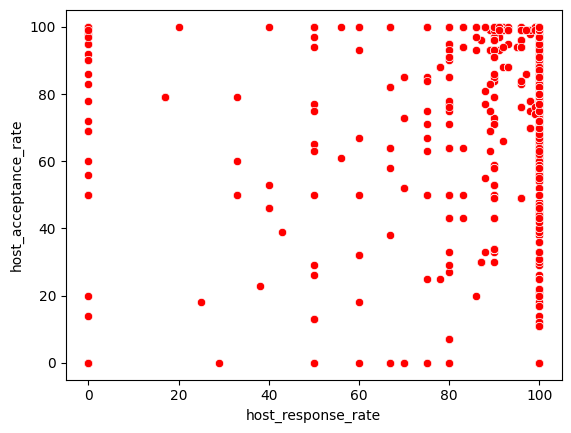

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

#Entire
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=entire)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

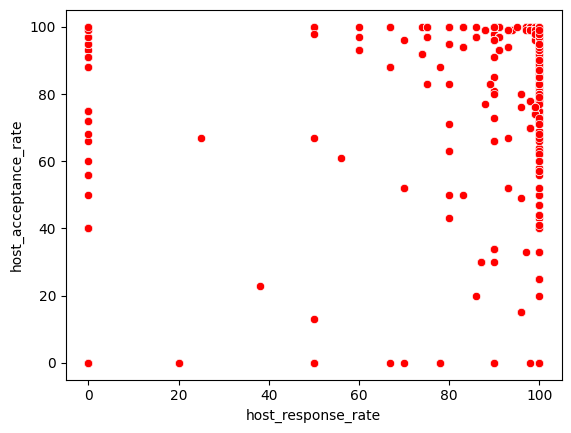

In [ ]:
#Private
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=private)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#En este caso son todas las variables que nos pide la instrucción
#Entire Home
Vars1_Indep1= entire[['host_response_rate']]
Var1_Dep1= entire['host_acceptance_rate']
Vars1_Indep2= entire[['review_scores_cleanliness']]
Var1_Dep2= entire['review_scores_location']
Vars1_Indep3= entire[['price']]
Var1_Dep3= entire['host_acceptance_rate']
Vars1_Indep4= entire[['number_of_reviews']]
Var1_Dep4= entire['availability_365']
Vars1_Indep5= entire[['number_of_reviews']]
Var1_Dep5= entire['host_acceptance_rate']
Vars1_Indep6= entire[['review_scores_communication']]
Var1_Dep6= entire['reviews_per_month']
#Private Room
Vars2_Indep1= private[['host_response_rate']]
Var2_Dep1= private['host_acceptance_rate']
Vars2_Indep2= private[['review_scores_cleanliness']]
Var2_Dep2= private['review_scores_location']
Vars2_Indep3= private[['price']]
Var2_Dep3= private['host_acceptance_rate']
Vars2_Indep4= private[['number_of_reviews']]
Var2_Dep4= private['availability_365']
Vars2_Indep5= private[['number_of_reviews']]
Var2_Dep5= private['host_acceptance_rate']
Vars2_Indep6= private[['review_scores_communication']]
Var2_Dep6= private['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Procedere a hacer un 'for' con las variables anteriormente declaradas para California
variables_independientes = [Vars1_Indep1, Vars1_Indep2, Vars1_Indep3, Vars1_Indep4, Vars1_Indep5, Vars1_Indep6,
                            Vars2_Indep1, Vars2_Indep2, Vars2_Indep3, Vars2_Indep4, Vars2_Indep5, Vars2_Indep6]
variables_dependientes = [Var1_Dep1, Var1_Dep2, Var1_Dep3, Var1_Dep4, Var1_Dep5, Var1_Dep6,
                          Var2_Dep1, Var2_Dep2, Var2_Dep3, Var2_Dep4, Var2_Dep5, Var2_Dep6]

In [ ]:
#For para nuestros modelos
model_dict = []
determinacion = []
correlacion = []

for i in range(len(variables_independientes)):
  variables_independientes[i] = variables_independientes[i].fillna(method = 'bfill')
  variables_independientes[i] = variables_independientes[i].fillna(method = 'ffill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'bfill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'ffill')
  model.fit(X = variables_independientes[i], y = variables_dependientes[i])
  determinacion.append(model.score(variables_independientes[i], variables_dependientes[i]))
  correlacion.append(np.sqrt(model.score(variables_independientes[i], variables_dependientes[i])))
  model_dict.append(model.__dict__)
  x = model_dict[i]
  print(x['coef_'],'x + ', x['intercept_'])

print()
display(determinacion, correlacion)

[0.33732977] x +  54.42412502384732
[0.17722005] x +  4.026526593117685
[-0.00646584] x +  88.64074838671097
[-0.38054431] x +  170.50042743307827
[0.07195903] x +  85.32343866943238
[-2.41016908] x +  12.573371000972367
[0.13833977] x +  76.50577833991221
[0.20628465] x +  3.861942847711276
[-0.00060825] x +  89.59109544456412
[-0.24817775] x +  174.0897402113587
[0.09192368] x +  86.87859647341516
[-2.21211834] x +  11.689325766996982



[0.044125096939840014,
 0.037153717035861344,
 0.006982276982391289,
 0.008143315534355877,
 0.009984043487329397,
 0.035047276243729386,
 0.018779293972829514,
 0.05899237079459063,
 0.0028176446387909726,
 0.003585298270561532,
 0.020264760181131547,
 0.03161138108806605]

[0.21005974611962192,
 0.19275299488169137,
 0.08356002023929439,
 0.09024032100095765,
 0.09992018558494273,
 0.18720917777643645,
 0.13703756409404508,
 0.24288345105130285,
 0.053081490547939335,
 0.059877360250444676,
 0.14235434725055482,
 0.17779589727568532]

In [ ]:
#Aqui procedemos a generar las tablas de determinacion y correlación
cali1 = []
cali1 = pd.DataFrame(cali1)
cali1['Determinación'] = determinacion[0:6]
cali1['Correlación'] = correlacion[0:6]

cali2 = []
cali2 = pd.DataFrame(cali2)
cali2['Determinación'] = determinacion[6:]
cali2['Correlación'] = correlacion[6:]

cali3 = []
cali3 = pd.DataFrame(cali3)
cali3['Determinación'] = determinacion
cali3['Correlación'] = correlacion

display('Entire home/apt: ',cali1,'Private room: ',cali2,'Suma Total: ',cali3)

'Entire home/apt: '

,Determinación,Correlación
0,0.044125,0.210060
1,0.037154,0.192753
2,0.006982,0.083560
3,0.008143,0.090240
4,0.009984,0.099920
5,0.035047,0.187209


'Private room: '

,Determinación,Correlación
0,0.018779,0.137038
1,0.058992,0.242883
2,0.002818,0.053081
3,0.003585,0.059877
4,0.020265,0.142354
5,0.031611,0.177796


'Suma Total: '

,Determinación,Correlación
0,0.044125,0.210060
1,0.037154,0.192753
2,0.006982,0.083560
3,0.008143,0.090240
4,0.009984,0.099920
5,0.035047,0.187209
6,0.018779,0.137038
7,0.058992,0.242883
8,0.002818,0.053081
9,0.003585,0.059877


###**Creación de modelo Distrito Federal**

In [ ]:
#Hay que eliminar cualquier caracter que no sea flotante
df_2.price= df_2.price.replace({'\$':''}, regex = True)
df_2.price= df_2.price.replace({'\,':''}, regex = True)
df_2['price'] = df_2['price'].astype(float)

In [ ]:
df_2.host_acceptance_rate= df_2.host_acceptance_rate.replace({'%':''}, regex = True)
df_2['host_acceptance_rate'] = df_2['host_acceptance_rate'].astype(float)

df_2.host_response_rate= df_2.host_response_rate.replace({'%':''}, regex = True)
df_2['host_response_rate'] = df_2['host_response_rate'].astype(float)

In [ ]:
#Quiero ver que tipos de habitacion hay
df_2['room_type'].value_counts()

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64

In [ ]:
#Estas son los tipos de habitaciones que quiero
entire = df_2[df_2['room_type'] == 'Entire home/apt']
private = df_2[df_2['room_type'] == 'Private room']
display(entire.shape,private.shape)

(15602, 71)

(8202, 71)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

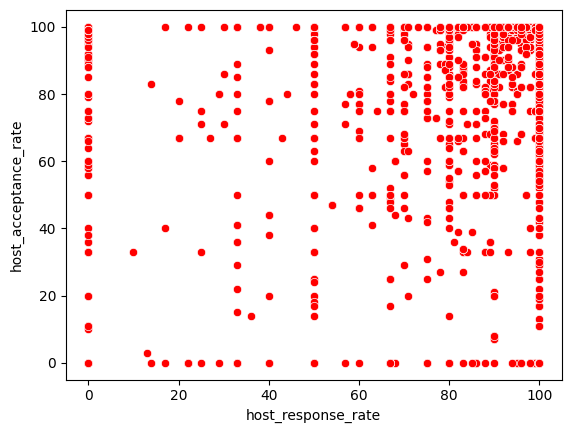

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

#Entire
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=entire)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

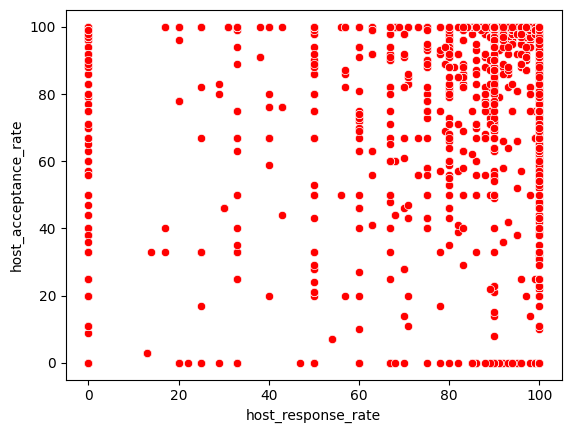

In [ ]:
#Private
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=private)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#En este caso son todas las variables que nos pide la instrucción
#Entire Home
Vars1_Indep1= entire[['host_response_rate']]
Var1_Dep1= entire['host_acceptance_rate']
Vars1_Indep2= entire[['review_scores_cleanliness']]
Var1_Dep2= entire['review_scores_location']
Vars1_Indep3= entire[['price']]
Var1_Dep3= entire['host_acceptance_rate']
Vars1_Indep4= entire[['number_of_reviews']]
Var1_Dep4= entire['availability_365']
Vars1_Indep5= entire[['number_of_reviews']]
Var1_Dep5= entire['host_acceptance_rate']
Vars1_Indep6= entire[['review_scores_communication']]
Var1_Dep6= entire['reviews_per_month']
#Private Room
Vars2_Indep1= private[['host_response_rate']]
Var2_Dep1= private['host_acceptance_rate']
Vars2_Indep2= private[['review_scores_cleanliness']]
Var2_Dep2= private['review_scores_location']
Vars2_Indep3= private[['price']]
Var2_Dep3= private['host_acceptance_rate']
Vars2_Indep4= private[['number_of_reviews']]
Var2_Dep4= private['availability_365']
Vars2_Indep5= private[['number_of_reviews']]
Var2_Dep5= private['host_acceptance_rate']
Vars2_Indep6= private[['review_scores_communication']]
Var2_Dep6= private['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Procedere a hacer un 'for' con las variables anteriormente declaradas para California
variables_independientes = [Vars1_Indep1, Vars1_Indep2, Vars1_Indep3, Vars1_Indep4, Vars1_Indep5, Vars1_Indep6,
                            Vars2_Indep1, Vars2_Indep2, Vars2_Indep3, Vars2_Indep4, Vars2_Indep5, Vars2_Indep6]
variables_dependientes = [Var1_Dep1, Var1_Dep2, Var1_Dep3, Var1_Dep4, Var1_Dep5, Var1_Dep6,
                          Var2_Dep1, Var2_Dep2, Var2_Dep3, Var2_Dep4, Var2_Dep5, Var2_Dep6]

In [ ]:
#For para nuestros modelos
model_dict = []
determinacion = []
correlacion = []

for i in range(len(variables_independientes)):
  variables_independientes[i] = variables_independientes[i].fillna(method = 'bfill')
  variables_independientes[i] = variables_independientes[i].fillna(method = 'ffill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'bfill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'ffill')
  model.fit(X = variables_independientes[i], y = variables_dependientes[i])
  determinacion.append(model.score(variables_independientes[i], variables_dependientes[i]))
  correlacion.append(np.sqrt(model.score(variables_independientes[i], variables_dependientes[i])))
  model_dict.append(model.__dict__)
  x = model_dict[i]
  print(x['coef_'],'x + ', x['intercept_'])

print()
display(determinacion, correlacion)

[0.43278325] x +  51.779521474254764
[0.14159063] x +  4.229393020661291
[3.46564596e-06] x +  93.48994717179048
[-0.31784801] x +  248.69257845136394
[0.09696795] x +  91.06534674875776
[-1.35938029] x +  8.201482053424714
[0.3747922] x +  53.24119420065673
[0.16935891] x +  4.107647368049235
[-4.58512387e-06] x +  87.3662175450093
[-0.3736975] x +  258.700119458428
[0.1703851] x +  84.78360415283028
[-1.94480212] x +  10.600508669451163



[0.12074770148221359,
 0.04362154757210601,
 8.069910240271483e-06,
 0.004755406669037954,
 0.021058728662751713,
 0.013526321371483019,
 0.11941487752518953,
 0.07328322063139259,
 1.8379551628644464e-05,
 0.004365004445020415,
 0.021822961247860095,
 0.03997385142489729]

[0.34748769975671595,
 0.20885772088219773,
 0.002840758743763976,
 0.06895945670492158,
 0.1451162591260942,
 0.11630271437710737,
 0.345564577937597,
 0.27070873763399766,
 0.004287137929743392,
 0.06606818027629045,
 0.14772596673523614,
 0.1999346178751876]

In [ ]:
#Aqui procedemos a generar las tablas de determinacion y correlación
df1 = []
df1 = pd.DataFrame(df1)
df1['Determinación'] = determinacion[0:6]
df1['Correlación'] = correlacion[0:6]

df2 = []
df2 = pd.DataFrame(df2)
df2['Determinación'] = determinacion[6:]
df2['Correlación'] = correlacion[6:]

df3 = []
df3 = pd.DataFrame(df3)
df3['Determinación'] = determinacion
df3['Correlación'] = correlacion

display('Entire home/apt: ',df1,'Private room: ',df2,'Suma Total: ',df3)

'Entire home/apt: '

,Determinación,Correlación
0,0.120748,0.347488
1,0.043622,0.208858
2,0.000008,0.002841
3,0.004755,0.068959
4,0.021059,0.145116
5,0.013526,0.116303


'Private room: '

,Determinación,Correlación
0,0.119415,0.345565
1,0.073283,0.270709
2,0.000018,0.004287
3,0.004365,0.066068
4,0.021823,0.147726
5,0.039974,0.199935


'Suma Total: '

,Determinación,Correlación
0,0.120748,0.347488
1,0.043622,0.208858
2,0.000008,0.002841
3,0.004755,0.068959
4,0.021059,0.145116
5,0.013526,0.116303
6,0.119415,0.345565
7,0.073283,0.270709
8,0.000018,0.004287
9,0.004365,0.066068


###**Creación de modelo Girona**

In [ ]:
#Hay que eliminar cualquier caracter que no sea flotante
df_3.price= df_3.price.replace({'\$':''}, regex = True)
df_3.price= df_3.price.replace({'\,':''}, regex = True)
df_3['price'] = df_3['price'].astype(float)

In [ ]:
df_3.host_acceptance_rate= df_3.host_acceptance_rate.replace({'%':''}, regex = True)
df_3['host_acceptance_rate'] = df_3['host_acceptance_rate'].astype(float)

df_3.host_response_rate= df_3.host_response_rate.replace({'%':''}, regex = True)
df_3['host_response_rate'] = df_3['host_response_rate'].astype(float)

In [ ]:
#Quiero ver que tipos de habitacion hay
df_3['room_type'].value_counts()

Entire home/apt    20598
Private room        1320
Hotel room            50
Shared room           25
Name: room_type, dtype: int64

In [ ]:
#Estas son los tipos de habitaciones que quiero
entire = df_3[df_3['room_type'] == 'Entire home/apt']
private = df_3[df_3['room_type'] == 'Private room']
display(entire.shape,private.shape)

(20598, 72)

(1320, 72)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

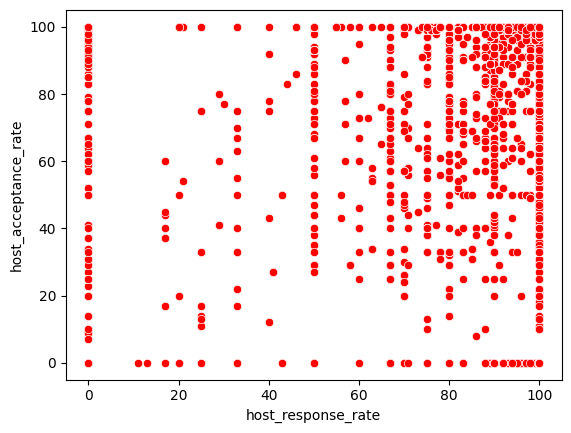

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

#Entire
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=entire)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

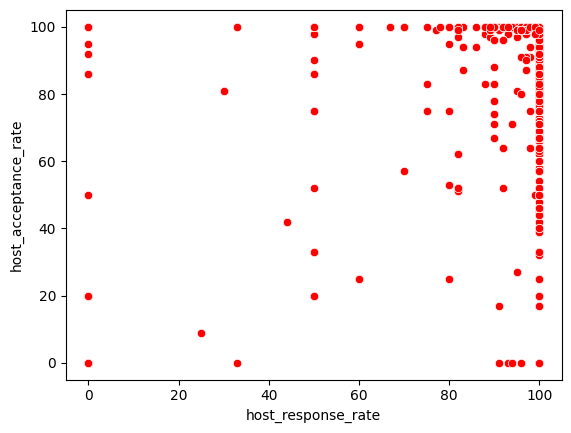

In [ ]:
#Private
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate',color="red", data=private)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#En este caso son todas las variables que nos pide la instrucción
#Entire Home
Vars1_Indep1= entire[['host_response_rate']]
Var1_Dep1= entire['host_acceptance_rate']
Vars1_Indep2= entire[['review_scores_cleanliness']]
Var1_Dep2= entire['review_scores_location']
Vars1_Indep3= entire[['price']]
Var1_Dep3= entire['host_acceptance_rate']
Vars1_Indep4= entire[['number_of_reviews']]
Var1_Dep4= entire['availability_365']
Vars1_Indep5= entire[['number_of_reviews']]
Var1_Dep5= entire['host_acceptance_rate']
Vars1_Indep6= entire[['review_scores_communication']]
Var1_Dep6= entire['reviews_per_month']
#Private Room
Vars2_Indep1= private[['host_response_rate']]
Var2_Dep1= private['host_acceptance_rate']
Vars2_Indep2= private[['review_scores_cleanliness']]
Var2_Dep2= private['review_scores_location']
Vars2_Indep3= private[['price']]
Var2_Dep3= private['host_acceptance_rate']
Vars2_Indep4= private[['number_of_reviews']]
Var2_Dep4= private['availability_365']
Vars2_Indep5= private[['number_of_reviews']]
Var2_Dep5= private['host_acceptance_rate']
Vars2_Indep6= private[['review_scores_communication']]
Var2_Dep6= private['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Procedere a hacer un 'for' con las variables anteriormente declaradas para California
variables_independientes = [Vars1_Indep1, Vars1_Indep2, Vars1_Indep3, Vars1_Indep4, Vars1_Indep5, Vars1_Indep6,
                            Vars2_Indep1, Vars2_Indep2, Vars2_Indep3, Vars2_Indep4, Vars2_Indep5, Vars2_Indep6]
variables_dependientes = [Var1_Dep1, Var1_Dep2, Var1_Dep3, Var1_Dep4, Var1_Dep5, Var1_Dep6,
                          Var2_Dep1, Var2_Dep2, Var2_Dep3, Var2_Dep4, Var2_Dep5, Var2_Dep6]

In [ ]:
#For para nuestros modelos
model_dict = []
determinacion = []
correlacion = []

for i in range(len(variables_independientes)):
  variables_independientes[i] = variables_independientes[i].fillna(method = 'bfill')
  variables_independientes[i] = variables_independientes[i].fillna(method = 'ffill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'bfill')
  variables_dependientes[i] = variables_dependientes[i].fillna(method = 'ffill')
  model.fit(X = variables_independientes[i], y = variables_dependientes[i])
  determinacion.append(model.score(variables_independientes[i], variables_dependientes[i]))
  correlacion.append(np.sqrt(model.score(variables_independientes[i], variables_dependientes[i])))
  model_dict.append(model.__dict__)
  x = model_dict[i]
  print(x['coef_'],'x + ', x['intercept_'])

print()
display(determinacion, correlacion)

[0.36482005] x +  55.86723658816872
[0.08723465] x +  4.443042775470416
[-0.00038631] x +  90.43523320128246
[0.17151119] x +  195.04544961414172
[0.00535216] x +  90.31692213687828
[-0.10486843] x +  0.781666029284986
[0.47046413] x +  42.53912149418552
[0.10873695] x +  4.321967699627187
[0.00193771] x +  85.91931836762117
[0.10331076] x +  210.8454425991971
[0.2343285] x +  84.82339351501516
[-0.33529568] x +  1.9303446334970897



[0.07924544935317779,
 0.028011952962581077,
 0.0001069504937371013,
 0.0001461724883219384,
 4.960928082442528e-06,
 0.005453087160187664,
 0.12728942382536634,
 0.030964352694970332,
 0.0021453042194657934,
 5.854960156559397e-05,
 0.007257446791906097,
 0.03637975787363268]

[0.28150568263034725,
 0.16736771780298934,
 0.010341687180392824,
 0.012090181484243253,
 0.002227314096045398,
 0.07384502122816178,
 0.3567764339546074,
 0.17596690795422398,
 0.046317428895241944,
 0.007651771139128115,
 0.08519064967416376,
 0.19073478412086423]

In [ ]:
#Aqui procedemos a generar las tablas de determinacion y correlación
girona1 = []
girona1 = pd.DataFrame(girona1)
girona1['Determinación'] = determinacion[0:6]
girona1['Correlación'] = correlacion[0:6]

girona2 = []
girona2 = pd.DataFrame(girona2)
girona2['Determinación'] = determinacion[6:]
girona2['Correlación'] = correlacion[6:]

girona3 = []
girona3 = pd.DataFrame(girona3)
girona3['Determinación'] = determinacion
girona3['Correlación'] = correlacion

display('Entire home/apt: ',girona1,'Private room: ',girona2,'Suma Total: ',girona3)

'Entire home/apt: '

,Determinación,Correlación
0,0.079245,0.281506
1,0.028012,0.167368
2,0.000107,0.010342
3,0.000146,0.012090
4,0.000005,0.002227
5,0.005453,0.073845


'Private room: '

,Determinación,Correlación
0,0.127289,0.356776
1,0.030964,0.175967
2,0.002145,0.046317
3,0.000059,0.007652
4,0.007257,0.085191
5,0.036380,0.190735


'Suma Total: '

,Determinación,Correlación
0,0.079245,0.281506
1,0.028012,0.167368
2,0.000107,0.010342
3,0.000146,0.012090
4,0.000005,0.002227
5,0.005453,0.073845
6,0.127289,0.356776
7,0.030964,0.175967
8,0.002145,0.046317
9,0.000059,0.007652


##**Tabla de los totales**

In [ ]:
#Tablas de los totales
display(cali3,df3,girona3)

,Determinación,Correlación
0,0.044125,0.210060
1,0.037154,0.192753
2,0.006982,0.083560
3,0.008143,0.090240
4,0.009984,0.099920
5,0.035047,0.187209
6,0.018779,0.137038
7,0.058992,0.242883
8,0.002818,0.053081
9,0.003585,0.059877


,Determinación,Correlación
0,0.120748,0.347488
1,0.043622,0.208858
2,0.000008,0.002841
3,0.004755,0.068959
4,0.021059,0.145116
5,0.013526,0.116303
6,0.119415,0.345565
7,0.073283,0.270709
8,0.000018,0.004287
9,0.004365,0.066068


,Determinación,Correlación
0,0.079245,0.281506
1,0.028012,0.167368
2,0.000107,0.010342
3,0.000146,0.012090
4,0.000005,0.002227
5,0.005453,0.073845
6,0.127289,0.356776
7,0.030964,0.175967
8,0.002145,0.046317
9,0.000059,0.007652
